# Stochastic Gradient Descent

## Indian Liver Patient Records

### kaynakça --> https://www.kaggle.com/uciml/indian-liver-patient-records

Aşırı alkol tüketimi, zararlı gazların solunması, kontamine gıda, turşu ve ilaç alımı nedeniyle karaciğer hastalığı olan hastalar sürekli artmaktadır. Bu veri seti, doktorlar üzerindeki yükü azaltmak amacıyla tahmin algoritmalarını değerlendirmek için kullanıldı.

Bu veri seti, Hindistan, Andhra Pradesh'in Kuzey Doğusundan toplanan 416 karaciğer hasta kaydı ve 167 karaciğer dışı hasta kaydını içerir. "Veri kümesi" sütunu, grupları karaciğer hastası (karaciğer hastalığı) veya değil (hastalık yok) olarak ayırmak için kullanılan bir sınıf etiketidir. Bu veri seti 441 erkek hasta kaydı ve 142 kadın hasta kaydı içermektedir.

Yaşı 89'u aşan herhangi bir hasta "90" yaşında olarak listelenir.

Sütunlar:

*Hastanın yaşı

*Hastanın cinsiyeti

*Toplam Bilirubin

*Doğrudan bilirubin

*alkalin fosfataz

*Alamin Aminotransferaz

*Aspartat Aminotransferaz

*Toplam Protienler

*Albümin

*Albümin ve Globulin Oranı

*Veri kümesi: verileri iki kümeye bölmek için kullanılan alan (karaciğer hastalığı olan veya hastalığı olmayan hasta)

# Stochastic Gradient Descent

*SGD sınıflandırıcısı SGD tarafından optimize edilmiş scikitlearn kitaplığı tarafından uygulanan doğrusal bir sınıflandırıcıdır. 
*Modelin girdisi (n_samples, n_features) biçimindeki seyrek ve yoğun özellik dizileridir. Burada uyduğu varsayılan model doğrusal SVM’dir. 
*SGDClassifier L1(MAE), L2(MSE), Elasticnet dahil olmak üzere çeşitli hataları destekler.

###  SGD Classifier modülü tarafından en çok kullanılan parametreler

1- loss − str, default = ‘hinge’: Uygularken kullanılacak kayıp fonksiyonunu temsil eder. Varsayılan değer, bize doğrusal bir SVM verecek olan 'menteşe'dir. Kullanılabilecek diğer seçenekler şunlardır: (log,modified_huber,squared_hinge,perceptron)

2- penalty − str, ‘none’, ‘l2’, ‘l1’, ‘elasticnet’: Modelde kullanılan düzenlileştirme terimidir. Varsayılan olarak, L2'dir. L1 veya 'elastik ağ kullanabiliriz; aynı zamanda, ancak her ikisi de modele seyreklik getirebilir, dolayısıyla L2 ile elde edilemez.

3- alpha − float, default = 0.0001: Düzenlileştirme terimini çoğaltan sabit olan Alpha, modeli ne kadar cezalandırmak istediğimize karar veren ayar parametresidir. Varsayılan değer 0.0001'dir.

4- random_state :  − int, RandomState instance or None, optional, default = none: Bu parametre, veriler karıştırılırken kullanılan sözde rastgele sayının tohumunu temsil eder. Seçenekler aşağıdadır.
   *int − In this case, random_state is the seed used by random number generator.

   *RandomState instance − In this case, random_state is the random number generator.

   *None − In this case, the random number generator is the RandonState instance used by np.random.

### Kütüphanelerin ve dataset çağırlması

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns #Seaborn, Matplotlib kütüphanesi tabanlı, istatiksel bir Python veri görselleştirme kütüphanesidir. Seaborn kullanıcılara istatiksel görselleştirmeler yapmaları için high-level (yüksek seviyeli) bir arayüz sunar.
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [127]:
df=pd.read_csv("indian_liver_patient.csv")

In [128]:
df.head(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   
5   46    Male              1.8               0.7                   208   
6   26  Female              0.9               0.2                   154   
7   29  Female              0.9               0.3                   202   
8   17    Male              0.9               0.3                   202   
9   55    Male              0.7               0.2                   290   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   
6                        16                          12             7.0   
7                        14                          11             6.7   
8                        22                          19             7.4   
9                        53                          58             6.8   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1  
5      4.4                        1.30        1  
6      3.5                        1.00        1  
7      3.6                        1.10        1  
8      4.1                        1.20        2  
9      3.4                        1.00        1

In [129]:
df.info() #veriseti ile ilgili bilgi alma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [130]:
print(df.duplicated()) #Tekrarlayan verileri tespiti
print(df.isnull().sum()) #Boş değerler tespiti 


0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [131]:
df.Gender=[1 if each=="Male" else 0 for each in df.Gender] #Veri dönüşümü 
df.Dataset=[each-1 for each in df.Dataset] # Dataset değerleri 1 ve 2 yerine 0 ve 1 yapmak
df.tail(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
573   32       1              3.7               1.6                   612   
574   32       1             12.1               6.0                   515   
575   32       1             25.0              13.7                   560   
576   32       1             15.0               8.2                   289   
577   32       1             12.7               8.4                   190   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
573                        50                          88             6.2   
574                        48                          92             6.6   
575                        41                          88             7.9   
576                        58                          80             5.3   
577                        28                          47             5.4   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
573      1.9                        0.40        0  
574      2.4                        0.50        0  
575      2.5                        2.50        0  
576      2.2                        0.70        0  
577      2.6                        0.90        0  
578      1.6                        0.37        1  
579      3.2                        1.10        0  
580      3.2                        1.00        0  
581      3.4                        1.00        0  
582      4.4                        1.50        1

In [132]:
df.dropna(inplace=True) # Boş değerlerin silinmesi 

print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [133]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


# Korelasyon: 
Korelasyon İki değişken arasındaki doğrusal ilişkinin yönü ve gücünü temsil eden değerdir.

<AxesSubplot:>

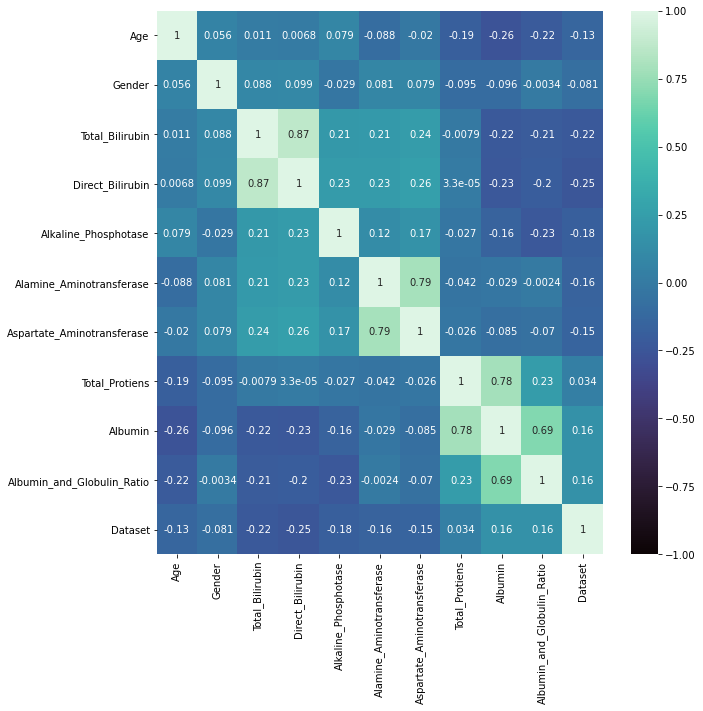

In [134]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, vmax=1,vmin=-1,center=0,cmap='mako')

## X ve Y değişkenine atanması

In [135]:
x = df.drop('Dataset', axis = 1)
y = df['Dataset']

In [136]:
x=(x-np.min(x))/(np.max(x)-np.min(x)) # Normalizasyon:verileri 0 ve 1 arasında yeniden ölçekler

In [137]:
from sklearn.model_selection import train_test_split #modelin eğitilmesi

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [138]:
from sklearn.linear_model import SGDClassifier #Heperparametre belirlenmesi
sgd = SGDClassifier(alpha = 0.001, loss = 'log', penalty = 'l2')
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

In [139]:
from sklearn import metrics #Modelin Değerlendirmesi
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
print("SGD  Accuracy:",metrics.accuracy_score(y_test,y_pred))

SGD  Accuracy: 0.7241379310344828


In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       129
           1       0.45      0.31      0.37        45

    accuracy                           0.72       174
   macro avg       0.62      0.59      0.60       174
weighted avg       0.70      0.72      0.71       174



In [141]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)


print(cm)
print(cr)
print(acc)

[[112  17]
 [ 31  14]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       129
           1       0.45      0.31      0.37        45

    accuracy                           0.72       174
   macro avg       0.62      0.59      0.60       174
weighted avg       0.70      0.72      0.71       174

0.7241379310344828


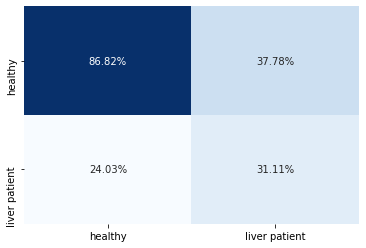

<AxesSubplot:>

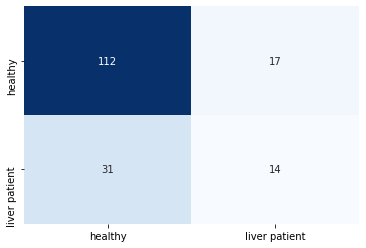

In [142]:
 import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
classNames=["healthy","liver patient"]
sns.heatmap(cm/cm.sum(axis=1),annot=True,fmt=".2%",cbar=False,xticklabels=classNames,yticklabels=classNames,cmap="Blues")
plt.show()
sns.heatmap(cm,annot=True,fmt="",cbar=False,xticklabels=classNames,yticklabels=classNames,cmap='Blues')

## K-Fold CV

Görünmeyen veriler üzerinde bir modelin performansını tahmin etmek için bir yöntem. En uygun hiperparametre değerine sahip modelin eğitilebileceği şekilde hiperparametre ayarlama için kullanılan bir tekniktir. Değiştirmeden yeniden örnekleme tekniğidir.

In [143]:

from sklearn.model_selection import cross_val_score
accler=cross_val_score(estimator=sgd,X=x,y=y,cv=10)

for i in accler:
    print(i)

print("mean value",np.mean(accler))

0.7413793103448276
0.7241379310344828
0.7241379310344828
0.7241379310344828
0.6896551724137931
0.7413793103448276
0.7068965517241379
0.7241379310344828
0.7068965517241379
0.7192982456140351
mean value 0.720205686630369


# ROC ve AUC eğrileri

ROC bir olasılık eğrisidir ve altında kalan alan olan AUC ayrılabilirliğin derecesini veya ölçüsünü temsil eder.
ROC eğrisinde X ekseninde FPR(Yanlış Pozitif Oran) ve Y ekseninde ise TPR (Gerçek Pozitif Oranı) bulunmaktadır.

In [144]:
probs=sgd.predict_proba(x_test)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
roc_auc=metrics.auc(fpr,tpr)

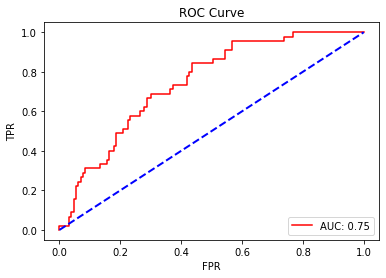

In [150]:
plt.plot(fpr,tpr,label="AUC: "+str(round(roc_auc,2)),color="red")
plt.plot([0,1],[0,1],color="blue",linestyle="--",lw="2")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha = 0.01, loss = 'log', penalty = 'l2')
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd_acc = accuracy_score(y_test, y_pred)
print(sgd_acc)

0.7068965517241379


In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha = 0.01, loss = 'hinge', penalty = 'l2')
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd_acc = accuracy_score(y_test, y_pred)
print(sgd_acc)

0.7068965517241379


In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha = 0.0001, loss = 'squared_hinge', penalty = 'l2')
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd_acc = accuracy_score(y_test, y_pred)
print(sgd_acc)

0.7327586206896551


In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(alpha = 1, loss = 'log', penalty = 'l2')
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd_acc = accuracy_score(y_test, y_pred)
print(sgd_acc)

0.7068965517241379
